In [6]:
# -*- coding: utf-8 -*-
import numpy
import pandas
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

class Prediction :

    def __init__(self):
        self.length_of_sequences = 10
        self.in_out_neurons = 1
        self.hidden_neurons = 300

    def load_data(self, data, n_prev=10):
        X, Y = [], []
        for i in range(len(data) - n_prev):
            #学習データとラベルを作成
            X.append(data.iloc[i:(i+n_prev)].as_matrix())
            Y.append(data.iloc[i+n_prev].as_matrix())
        retX = numpy.array(X)
        retY = numpy.array(Y)
        return retX, retY


    def create_model(self) :
        model = Sequential()
        #LSTM一層作成
        model.add(LSTM(self.hidden_neurons, \
                  batch_input_shape=(None, self.length_of_sequences, self.in_out_neurons), \
                  return_sequences=False ))
        #全結合層
        model.add(Dense(self.in_out_neurons))
        #活性化関数
        model.add(Activation("linear"))
        #重み更新
        model.compile(loss="mape", optimizer="adam")
        return model


    def train(self, X_train, y_train) :
        model = self.create_model()
        # 学習
        model.fit(X_train, y_train, batch_size=10, nb_epoch=100)
        return model


if __name__ == "__main__":

    prediction = Prediction()

  # データ準備
    data = None
    #２００７年から2017年までのデータを仕様
    for year in range(2016, 2018):
        #データread
        data_ = pandas.read_csv('csv_stock/stocks_5406-T_1d_' + str(year) +  '.csv',encoding='shift-jis')
        #データをひとまとまりにする
        data = data_ if (data is None) else pandas.concat([data, data_])
    #カラム名変更
    data.columns = ['date', 'open', 'high', 'low', 'close','Price','Buying and selling price']
    data['date'] = pandas.to_datetime(data['date'], format='%Y-%m-%d')
  # 終値のデータを標準化
    data['close'] = preprocessing.scale(data['close'])
    #日でソーティングする
    data = data.sort_values(by='date')
    #インデックスをリセットする
    data = data.reset_index(drop=True)
    #日と終値のみのデータにする。
    data = data.loc[:, ['date', 'close']]
    #2016年9月27以前の株価がおかしいので補正
    data.loc[(data['date'].dt.day <=27 )& (data['date'].dt.month <= 9 )& (data['date'].dt.year <= 2016), 'close'] *= 10


      # 2割をテストデータへ
    split_pos = int(len(data) * 0.8)
    print("data:",data['close'].shape)
    print("split_pos:",split_pos)
    
    x_train, y_train = prediction.load_data(data[['close']].iloc[0:split_pos], prediction.length_of_sequences)
    x_test,  y_test  = prediction.load_data(data[['close']].iloc[split_pos:], prediction.length_of_sequences)

    model = prediction.train(x_train, y_train)
    
    predicted = model.predict(x_test)
    

data: (457,)
split_pos: 365


/Users/kenji_tachibana/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
355/355 [==============================] - 2s - loss: 61.1585     
Epoch 2/100
355/355 [==============================] - 1s - loss: 50.5667     
Epoch 3/100
355/355 [==============================] - 1s - loss: 49.7756     
Epoch 4/100
355/355 [==============================] - 1s - loss: 47.4521     
Epoch 5/100
355/355 [==============================] - 1s - loss: 47.9712     
Epoch 6/100
355/355 [==============================] - 1s - loss: 46.3828     
Epoch 7/100
355/355 [==============================] - 1s - loss: 44.8579     
Epoch 8/100
355/355 [==============================] - 1s - loss: 43.8768     
Epoch 9/100
355/355 [==============================] - 1s - loss: 43.2671     
Epoch 10/100
355/355 [==============================] - 1s - loss: 44.8929     
Epoch 11/100
355/355 [==============================] - 1s - loss: 46.8674     
Epoch 12/100
355/355 [==============================] - 1s - loss: 42.4654     
Epoch 13/100
355/355 [===========================

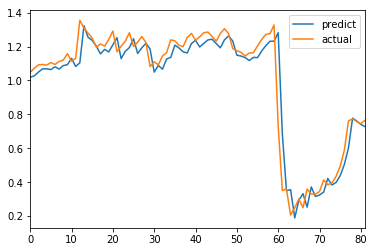

In [7]:
result = pandas.DataFrame(predicted)
result.columns = ['predict']
result['actual'] = y_test
result.plot()
plt.show()

In [9]:
data[‘date’] = pandas.to_datetime(data[‘date’], format=’%Y-%m-%d’)

(82, 10, 1)

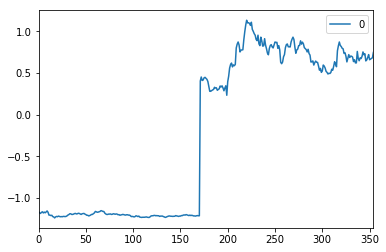

In [11]:
y_train

array([[-1.16630786],
       [-1.17825668],
       [-1.18622255],
       [-1.17427374],
       [-1.16630786],
       [-1.18024814],
       [-1.1702908 ],
       [-1.17825668],
       [-1.16829933],
       [-1.15635052],
       [-1.17228227],
       [-1.20613724],
       [-1.20613724],
       [-1.21211165],
       [-1.20812871],
       [-1.22406046],
       [-1.2280434 ],
       [-1.23999221],
       [-1.2280434 ],
       [-1.22206899],
       [-1.22605193],
       [-1.21808605],
       [-1.22206899],
       [-1.22605193],
       [-1.22406046],
       [-1.22605193],
       [-1.22206899],
       [-1.22206899],
       [-1.22406046],
       [-1.22206899],
       [-1.21609458],
       [-1.20613724],
       [-1.20016283],
       [-1.19020549],
       [-1.19020549],
       [-1.19817136],
       [-1.19817136],
       [-1.19418843],
       [-1.18821402],
       [-1.18622255],
       [-1.19219696],
       [-1.19020549],
       [-1.18423108],
       [-1.18622255],
       [-1.19219696],
       [-1